**Name:** LOW, Zhi Hao

**EID:** zhlow2

**SID:** 54924670

# CS4487 - Tutorial 4: Predicting Popularity of Online News

In this tutorial you will train regression models to predict the number of "shares" of a news article on Mashable.

First we need to initialize Python.  Run the below cell.

In [1]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
import glob
import os
import csv
import string
random.seed(100)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of 

## 1. Loading Data and Pre-processing
Next we need to load the data.  Download `OnlineNewsPopularity.zip`, and **unzip** it in the same directory as this ipynb file.  Then run the following cell to load the data.

In [2]:
filename = 'OnlineNewsPopularity/OnlineNewsPopularity.csv'

# read the data
allfeatnames = []
textdata      = []
with open(filename, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(allfeatnames)==0:
            allfeatnames = row
        else:
            textdata.append(row)

# put the data into a np array
dataX = empty((len(textdata), len(allfeatnames)-3))
dataY = empty(len(textdata))
for i,row in enumerate(textdata):
    # extract features (remove the first 2 features and the last feature)
    dataX[i,:] = array([float(x) for x in row[2:-1]])
    # extract target (last entry)
    dataY[i] = float(row[-1])
    
# extract feature names
featnames = [x.strip() for x in allfeatnames[2:-1]]

# extract a subset of data
dataX = dataX[::6]
dataY = dataY[::6]

print(dataX.shape)
print(dataY.shape)

(6608, 58)
(6608,)


There are 58 features for each article.  Here are the feature names, and an example entry.  The actual description of the features can be found in the `OnlineNewsPopularity-features.txt` file.

In [3]:
print(featnames)

print("--- example article features---")
print(dataX[0])
print("--- example article target (# of shares)")
print(dataY[0])

['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarit

Now separate the data into training and testing sets.

In [4]:
# randomly split data into 50% train and 50% test set
trainX, testX, trainYo, testYo = \
  model_selection.train_test_split(dataX, dataY, 
  train_size=0.50, test_size=0.50, random_state=4487)

print(trainX.shape)
print(testX.shape)

(3304, 58)
(3304, 58)


Finally, we normalize the input features.

In [5]:
# normalize feature values
# this makes comparing weights more meaningful
scaler = preprocessing.StandardScaler()  
trainXn = scaler.fit_transform(trainX)  
testXn  = scaler.transform(testX)    

Because the target value (number of shares) has a large dynamic range, we will transform the target values through the log function.

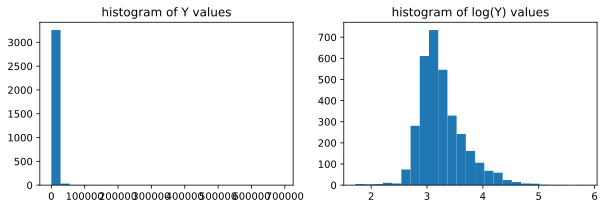

In [6]:
# map targets to log-space
trainY = log10(trainYo)
testY  = log10(testYo)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.hist(trainYo, 25);
plt.title('histogram of Y values')
plt.subplot(1,2,2)
plt.hist(trainY, 25);
plt.title("histogram of log(Y) values");

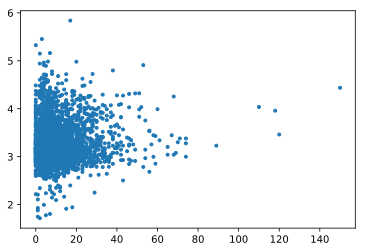

In [26]:
plt.plot(trainX.T[5],trainY,'.')

## 2. Prediction with Linear Regression

First we will look at predicting the number of shares using simple linear regression models.  Use the training data to fit a linear model using Ordinary Least Squares and Ridge Regression.  Use cross-validation on the training set to select the optimal $\alpha$ parameter for ridge regression.

In [65]:
### INSERT YOUR CODE HERE
## HINT: 
# 1. Ordinary Least Squares: linear_model.LinearRegression()
# 2. Ridge Regression: linear_model.Ridge(alphas= )
# 3. Rigge Regression with Cross-validation: linear_model.Ridge(alphas= )

from sklearn import linear_model
from sklearn.metrics import accuracy_score

li_reg = linear_model.LinearRegression()
li_reg.fit(trainXn,trainY)

print(li_reg.score(testXn,testY))


-712376411.1117321


In [66]:
li_rig = linear_model.Ridge(alpha=logspace(-1,1,1))
li_rig.fit(trainXn,trainY)

print(li_rig.score(testXn,testY))

0.10004327373721622


In [87]:
li_rigcv = linear_model.RidgeCV(alphas=logspace(-5,10,50), cv= 4)
li_rigcv.fit(trainXn,trainY)
print(li_rigcv.alpha_ )

449.8432668969444


Compare the two models using the _average absolute error_ (AE) between the predictions and the true values.  Below is  code that will calculate AE for the training and test sets.

In [84]:
# ols is the linear regression model
ols = li_reg
trainAE = metrics.mean_absolute_error(trainY, ols.predict(trainXn))
testAE  = metrics.mean_absolute_error(testY, ols.predict(testXn))
print("OLS: train error =", trainAE)
print("OLS: test error =", testAE)

OLS: train error = 0.2868768266761912
OLS: test error = 187.36089080105177


In [85]:
# rr is the ridge regression model
rr= li_rigcv
trainAE = metrics.mean_absolute_error(trainY, rr.predict(trainXn))
testAE  = metrics.mean_absolute_error(testY, rr.predict(testXn))
print("RR: train error =", trainAE)
print("RR: test error =", testAE)

RR: train error = 0.28883570239702727
RR: test error = 0.2855670316007427


Which model has better prediction ability on the test set? Why?
- Ridge regression is better than linear regression
- The datasets contains a lot of outliers, which will heavily influence the result. Therefore the consideration of ridge regression is b

## 3. Which features are important?
Next we will investigate which features are the most important for the prediction.  Use LASSO with cross-validation to learn the model, and print the training and testing error.

In [ ]:
### INSERT YOUR CODE HERE
## HINT
# 1. LASSO with Cross-validation: linear_model.LassoCV()

Examine the LASSO coefficients by sorting them in descending order.

In [ ]:
# sort coefficients from smallest to largest, then reverse it
inds = argsort(abs(las.coef_))[::-1]
# print out
print("weight : feature description")
for i in inds:
    print("{: .3f} : {}".format(las.coef_[i], featnames[i]))

_Which features are most important for predicting the number of shares?  For these features, which feature values (low or high values) will yield a higher number of shares?_
- **INSERT YOUR ANSWER HERE**